In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [52]:
data = pd.read_csv("sonar.csv", header = None)
y=data.iloc[:,60]
x = data.iloc[:,:60]
x.head()
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)



In [57]:
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing as pp

In [58]:
enc = pp.LabelEncoder()
y_train=enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)


In [108]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,activation="relu", input_shape=(60,)),
    tf.keras.layers.Dense(16,activation="relu"),
    #tf.keras.layers.Dense(45,activation="relu"),
    #tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    
    
])

In [109]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [112]:
history = model.fit(x_train,y_train,epochs=10,validation_data = (x_test,y_test))

Train on 166 samples, validate on 42 samples
Epoch 1/10
166/166 [==============================] - 0s 393us/sample - loss: 0.1742 - acc: 0.9337 - val_loss: 0.5158 - val_acc: 0.8095
Epoch 2/10
166/166 [==============================] - 0s 184us/sample - loss: 0.1753 - acc: 0.9337 - val_loss: 0.6494 - val_acc: 0.7381
Epoch 3/10
166/166 [==============================] - 0s 310us/sample - loss: 0.1654 - acc: 0.9518 - val_loss: 0.6473 - val_acc: 0.7381
Epoch 4/10
166/166 [==============================] - 0s 253us/sample - loss: 0.1633 - acc: 0.9458 - val_loss: 0.6931 - val_acc: 0.7619
Epoch 5/10
166/166 [==============================] - 0s 244us/sample - loss: 0.1719 - acc: 0.9398 - val_loss: 0.6010 - val_acc: 0.7619
Epoch 6/10
166/166 [==============================] - 0s 102us/sample - loss: 0.1662 - acc: 0.9458 - val_loss: 0.6330 - val_acc: 0.7381
Epoch 7/10
166/166 [==============================] - 0s 247us/sample - loss: 0.1674 - acc: 0.9398 - val_loss: 0.5433 - val_acc: 0.7619
Epo

In [91]:
import matplotlib.pyplot as plt

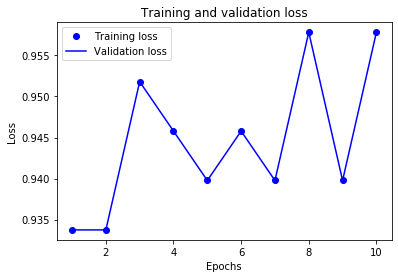

In [119]:
loss = history.history['acc'] 
val_loss = history.history['acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()
